In [69]:
price = np.random.randint(100,400,16)
np.sort(price)
price[4] = price[4]-100
price[9] = price[9]-100
price[15] = price[15]-100
year = np.linspace(2005,2020,16).astype(int)

In [70]:
price,year

(array([219, 305, 304, 195, 115, 217, 321, 358, 283, 144, 382, 224, 305,
        296, 297, 207]),
 array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020]))

In [71]:
df= pd.DataFrame({
                 "Year": year,
                 "Price":price,
                  })

In [88]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Price,219,305,304,195,115,217,321,358,283,144,382,224,305,296,297,207


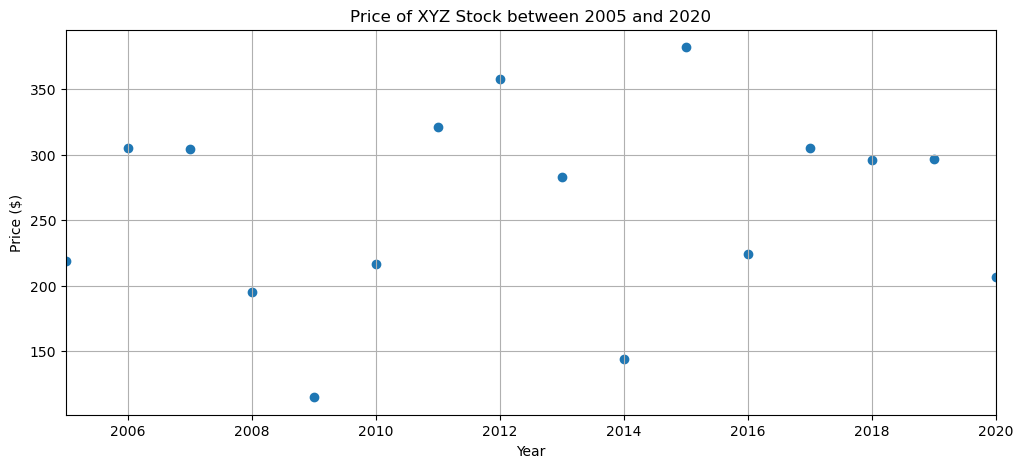

In [73]:
plt.figure(figsize=(12,5))
plt.scatter(df['Year'], df["Price"])
plt.title("Price of XYZ Stock between 2005 and 2020")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.xlim(2005,2020)
plt.grid()

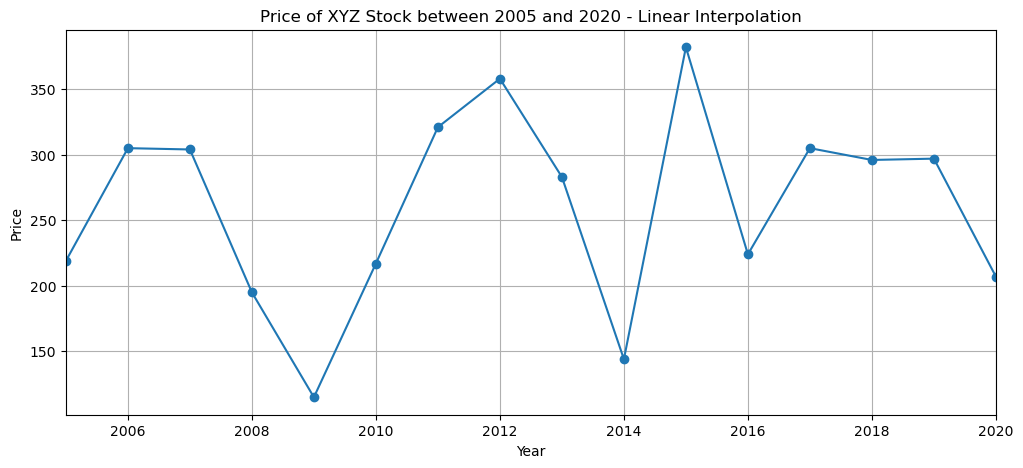

In [81]:
plt.figure(figsize=(12,5))
plt.plot(df['Year'].sort_values(), df["Price"], marker="o")
plt.title("Price of XYZ Stock between 2005 and 2020 - Linear Interpolation")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xlim(2005,2020)
plt.grid()
plt.show()

In [82]:
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d
from numpy.polynomial.polynomial import Polynomial

In [125]:
year2 = np.linspace(2005,2020,200)
f1 = interp1d(df["Year"], df["Price"], kind='cubic')
f2 = interp1d(df["Year"], df["Price"], kind='quadratic')
f3 = interp1d(df["Year"], df["Price"], kind='nearest')
f4 = interp1d(df["Year"], df["Price"], kind='slinear')

$$ Price = B(Year)^2 + C(Year) + D$$
Where B, C, and D are constant.

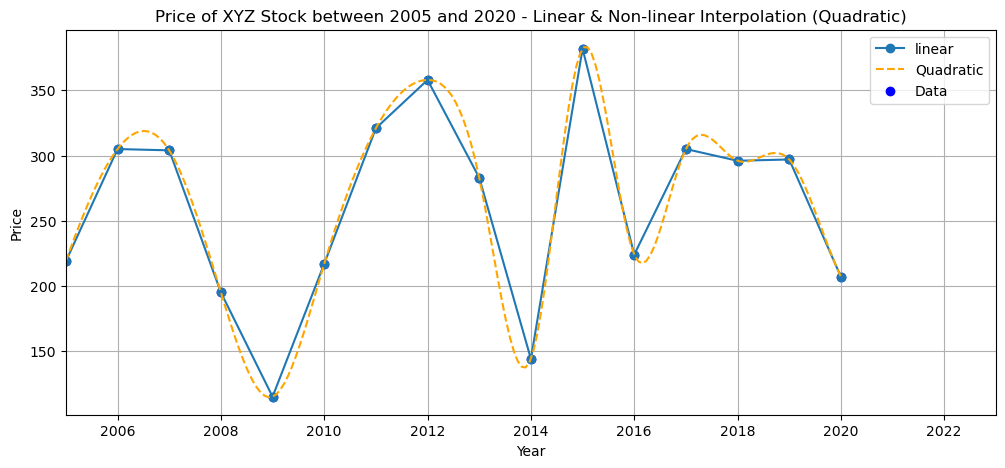

In [115]:
plt.figure(figsize=(12,5))
plt.plot(df['Year'], df["Price"], marker="o", label="linear")
plt.plot(year2, f2(year2), color="orange", ls="--", label="Quadratic")
plt.scatter(year, price, color = "blue", marker="o", label="Data")
plt.title("Price of XYZ Stock between 2005 and 2020 - Linear & Non-linear Interpolation (Quadratic)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xlim(2005,2023)
plt.grid()
plt.legend()
plt.show()

$$ Price = A(Year)^3 + B(Year)^2 + C(Year) + D$$
Where A, B, C, and D are constant.

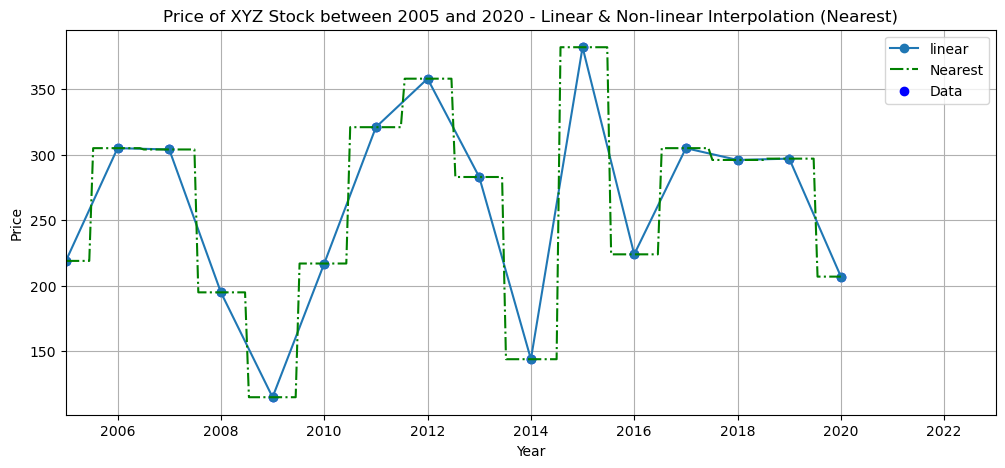

In [123]:
plt.figure(figsize=(12,5))
plt.plot(df['Year'], df["Price"], marker="o", label="linear")
plt.plot(year2, f3(year2), color="green", ls="-.", label="Nearest")
plt.scatter(year, price, color = "blue", marker="o", label="Data")
plt.title("Price of XYZ Stock between 2005 and 2020 - Linear & Non-linear Interpolation (Nearest)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xlim(2005,2023)
plt.grid()
plt.legend()
plt.show()

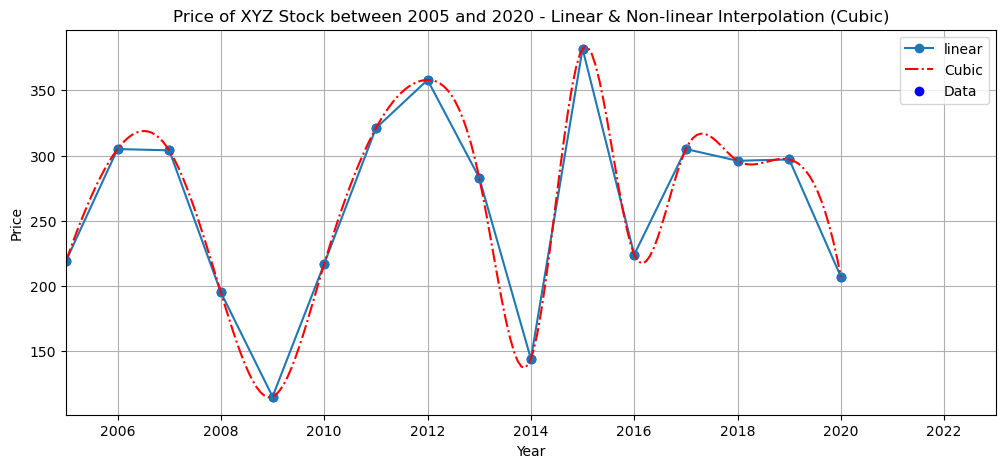

In [124]:
plt.figure(figsize=(12,5))
plt.plot(df['Year'], df["Price"], marker="o", label="linear")
plt.plot(year2, f1(year2), color="red", ls="-.", label="Cubic")
plt.scatter(year, price, color = "blue", marker="o", label="Data")
plt.title("Price of XYZ Stock between 2005 and 2020 - Linear & Non-linear Interpolation (Cubic)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xlim(2005,2023)
plt.grid()
plt.legend()
plt.show()

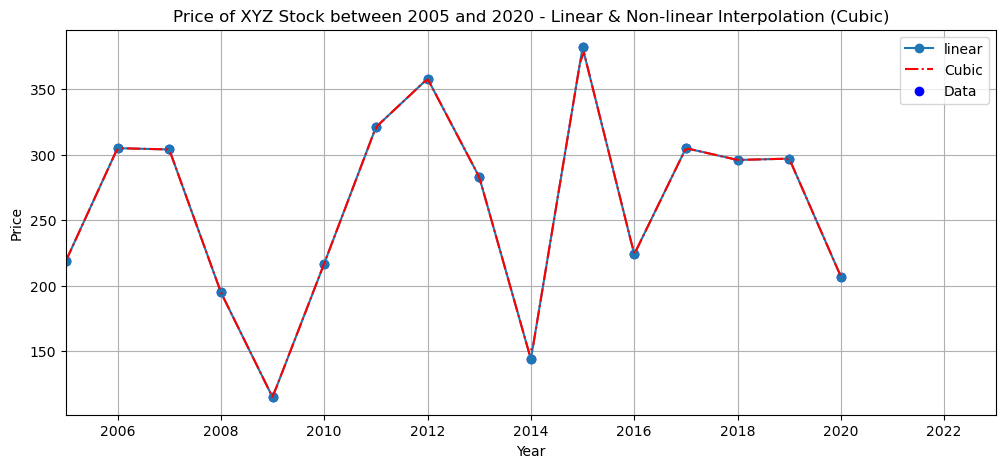

In [126]:
plt.figure(figsize=(12,5))
plt.plot(df['Year'], df["Price"], marker="o", label="linear")
plt.plot(year2, f4(year2), color="red", ls="-.", label="Cubic")
plt.scatter(year, price, color = "blue", marker="o", label="Data")
plt.title("Price of XYZ Stock between 2005 and 2020 - Linear & Non-linear Interpolation (Cubic)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xlim(2005,2023)
plt.grid()
plt.legend()
plt.show()

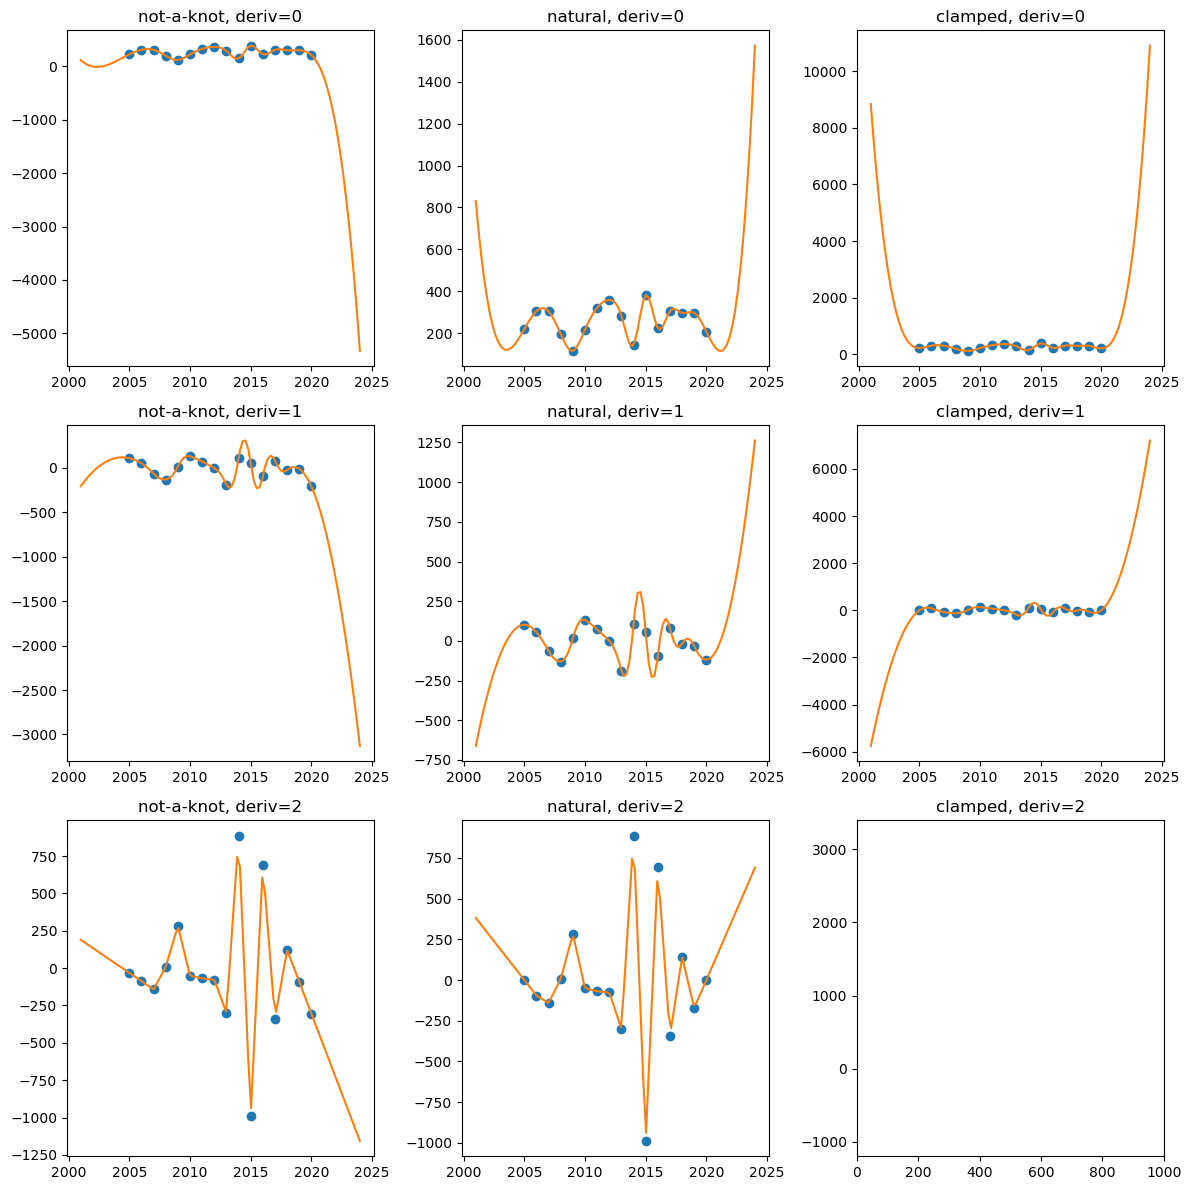

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

xs = year
ys = price

notaknot = CubicSpline(xs, ys, bc_type='not-a-knot')
natural = CubicSpline(xs, ys, bc_type='natural')
clamped = CubicSpline(xs, ys, bc_type='clamped')
xnew = np.linspace(min(xs) - 4 , max(xs) + 4, 101)

splines = [notaknot, natural, clamped]
titles = ['not-a-knot', 'natural', 'clamped']

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in [0, 1, 2]:
    for j, spline, title in zip(range(3), splines, titles):
        axs[i, j].plot(xs, spline(xs, nu=i),'o')
        axs[i, j].plot(xnew, spline(xnew, nu=i),'-')
        axs[i, j].set_title(f'{title}, deriv={i}')

plt.tight_layout()
plt.xlim(1995,2050)
plt.xlim(0,1000)
plt.show()

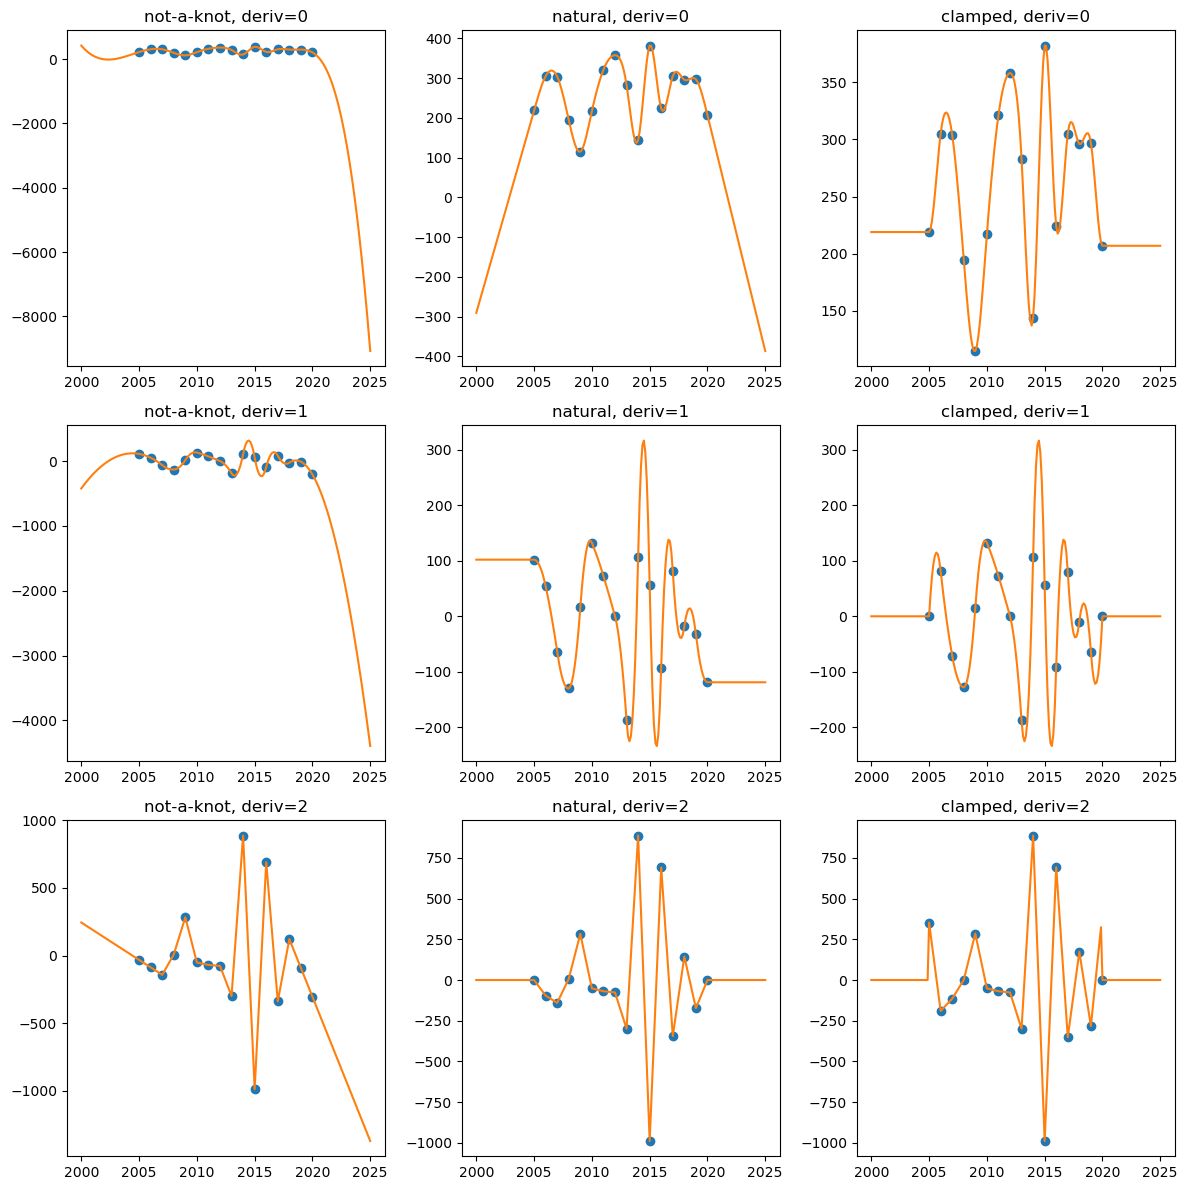

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def add_boundary_knots(spline):
    """
    Add knots infinitesimally to the left and right.

    Additional intervals are added to have zero 2nd and 3rd derivatives,
    and to maintain the first derivative from whatever boundary condition
    was selected. The spline is modified in place.
    """
    # determine the slope at the left edge
    leftx = spline.x[0]
    lefty = spline(leftx)
    leftslope = spline(leftx, nu=1)

    # add a new breakpoint just to the left and use the
    # known slope to construct the PPoly coefficients.
    leftxnext = np.nextafter(leftx, leftx - 1)
    leftynext = lefty + leftslope*(leftxnext - leftx)
    leftcoeffs = np.array([0, 0, leftslope, leftynext])
    spline.extend(leftcoeffs[..., None], np.r_[leftxnext])

    # repeat with additional knots to the right
    rightx = spline.x[-1]
    righty = spline(rightx)
    rightslope = spline(rightx,nu=1)
    rightxnext = np.nextafter(rightx, rightx + 1)
    rightynext = righty + rightslope * (rightxnext - rightx)
    rightcoeffs = np.array([0, 0, rightslope, rightynext])
    spline.extend(rightcoeffs[..., None], np.r_[rightxnext])

xs = year
ys = price

notaknot = CubicSpline(xs,ys, bc_type='not-a-knot')
# not-a-knot does not require additional intervals

natural = CubicSpline(xs,ys, bc_type='natural')
# extend the natural natural spline with linear extrapolating knots
add_boundary_knots(natural)

clamped = CubicSpline(xs,ys, bc_type='clamped')
# extend the clamped spline with constant extrapolating knots
add_boundary_knots(clamped)

xnew = np.linspace(min(xs) - 5, max(xs) + 5, 201)

fig, axs = plt.subplots(3, 3,figsize=(12,12))

splines = [notaknot, natural, clamped]
titles = ['not-a-knot', 'natural', 'clamped']

for i in [0, 1, 2]:
    for j, spline, title in zip(range(3), splines, titles):
        axs[i, j].plot(xs, spline(xs, nu=i),'o')
        axs[i, j].plot(xnew, spline(xnew, nu=i),'-')
        axs[i, j].set_title(f'{title}, deriv={i}')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BPoly

def f(x, a):
    return a*x - 1/np.tan(x)

#xleft, xright = 0.2, np.pi/2
#x = np.linspace(xleft, xright, 11)
x = np.linspace(xleft, xright, 11)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for j, a in enumerate([3, 93]):
    y = f(x, a)
    dydx = a + 1./np.sin(x)**2    # d(ax - 1/tan(x)) / dx
    dxdy = 1 / dydx               # dx/dy = 1 / (dy/dx)

    xdx = np.c_[x, dxdy]
    spl = BPoly.from_derivatives(y, xdx)   # inverse interpolation

    yy = np.linspace(f(xleft, a), f(xright, a), 51)
    ax[j].plot(yy, spl(yy), '--')
    ax[j].plot(y, x, 'o')
    ax[j].set_xlabel(r'$y$')
    ax[j].set_ylabel(r'$x$')
    ax[j].set_title(rf'$a = {a}$')

    ax[j].plot(0, spl(0), 'o', ms=12)
    ax[j].text(0.1, 0.85, fr'$x_0 = {spl(0):.3f}$',
               transform=ax[j].transAxes, fontsize=18)
    ax[j].grid(True)
plt.tight_layout()
plt.show()

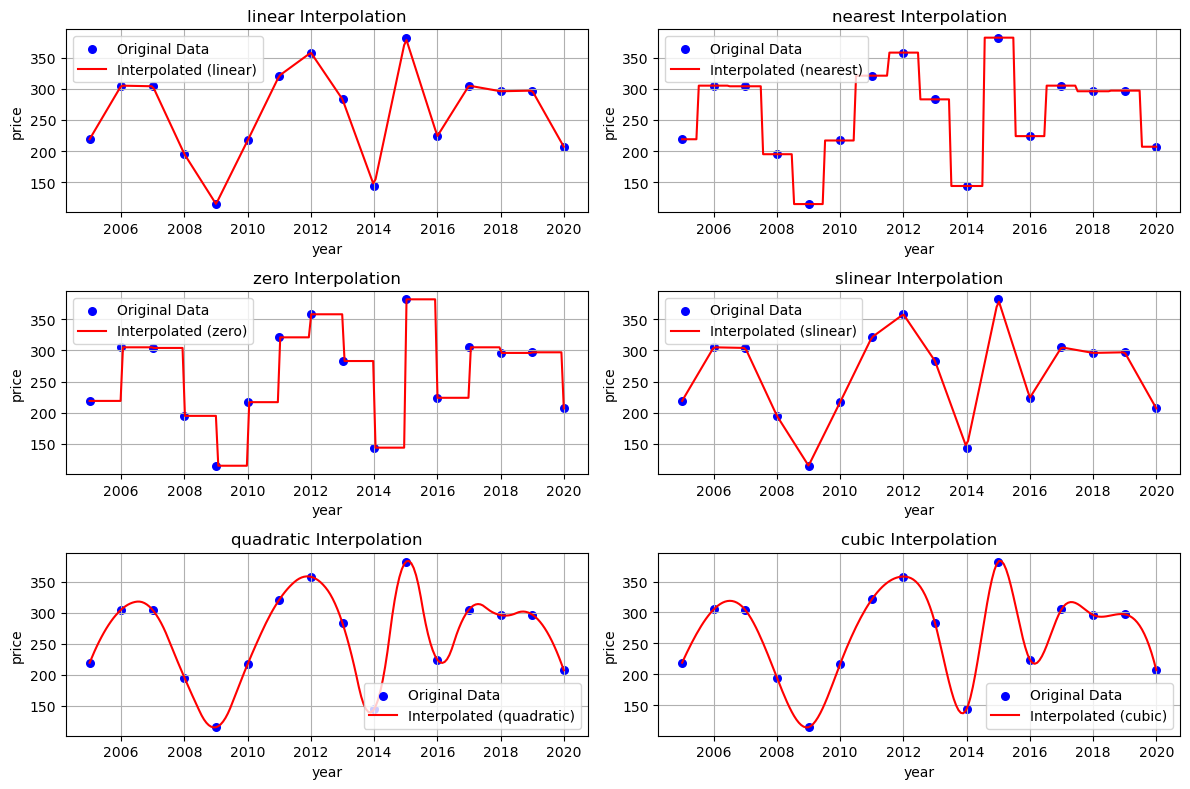

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate the original dataset (sine wave with noise)
#x_original = np.linspace(0, 10, 20)
#y_original = np.sin(x_original) + 0.1 * np.random.randn(20)
x_original = year
y_original = price
# Define x-values for interpolation
x_interpolation = year2

# Define interpolation methods
methods = ['linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic']

# Create subplots for each interpolation method
plt.figure(figsize=(12, 8))

for i, method in enumerate(methods):
    plt.subplot(3,2, i + 1)

    # Perform interpolation using the current method
    interpolator = interp1d(x_original, y_original, kind=method)
    y_interpolated = interpolator(x_interpolation)

    # Plot the original data
    plt.scatter(x_original, y_original, label='Original Data', color='blue', marker='o', s=30)

    # Plot the interpolated data
    plt.plot(x_interpolation, y_interpolated, label=f'Interpolated ({method})', color='red')

    # Add labels and a legend
    plt.xlabel('year')
    plt.ylabel('price')
    plt.legend()
    plt.grid(True)
    plt.title(f'{method} Interpolation')

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_17247/3734486202.py:26: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp = interpolate.interp2d(x, y, z, kind=method)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_17247/3734486202.py:27: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and 

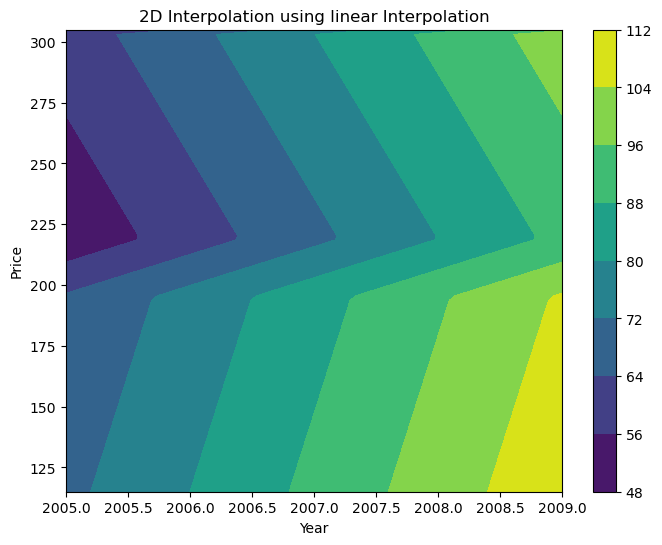

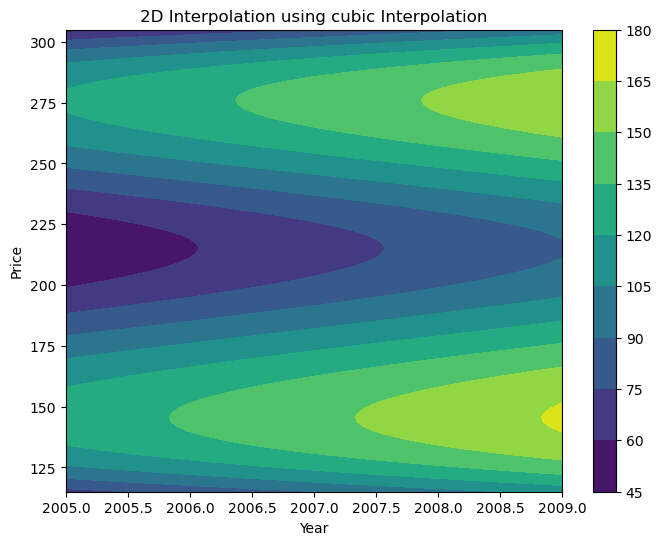

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Create a dataset (example data)
x = year[:5]
y = price[:5]
z = np.array([[50, 60, 70, 80, 90],
              [55, 65, 75, 85, 95],
              [60, 70, 80, 90, 100],
              [65, 75, 85, 95, 105],
              [70, 80, 90, 100, 110]])

# Define a grid of points for visualization
x_new, y_new = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

# List of interpolation methods
methods = ['linear', 'cubic']

# Interpolate and plot using different methods
for method in methods:
    plt.figure(figsize=(8, 6))
    plt.title(f'2D Interpolation using {method} Interpolation')
    
    # Perform 2D interpolation
    interp = interpolate.interp2d(x, y, z, kind=method)
    z_new = interp(x_new[0], y_new[:, 0])
    
    # Plot the interpolated surface
    plt.contourf(x_new, y_new, z_new, cmap='viridis')
    plt.colorbar()
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_17247/1500663413.py:31: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp = interpolate.interp2d(x, y, z, kind=method)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_17247/1500663413.py:32: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and 

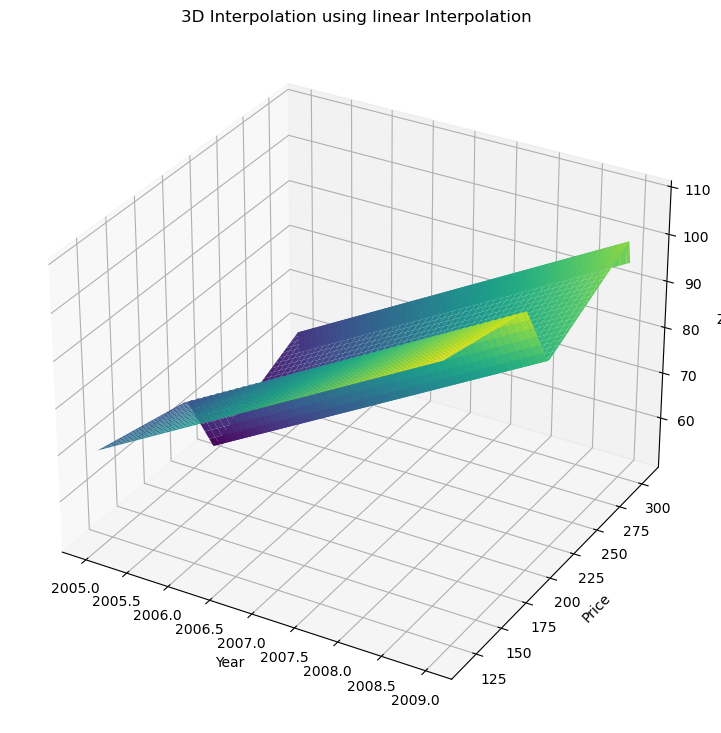

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate

# Create a 3D dataset (example data)
x = year[:5]
y = price[:5]
z = np.array([[50, 60, 70, 80, 90],
              [55, 65, 75, 85, 95],
              [60, 70, 80, 90, 100],
              [65, 75, 85, 95, 105],
              [70, 80, 90, 100, 110]])

# Define a grid of points for visualization
x_new, y_new = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

# List of 3D interpolation methods
methods = ['linear', 'cubic']

# Create a 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Interpolate and plot using different methods
for method in methods:
    ax.clear()
    ax.set_title(f'3D Interpolation using {method} Interpolation')
    
    # Create a 3D interpolator
    interp = interpolate.interp2d(x, y, z, kind=method)
    z_new = interp(x_new[0], y_new[:, 0])
    
    # Plot the interpolated surface
    ax.plot_surface(x_new, y_new, z_new, cmap='viridis')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.set_zlabel('Z')
    
    plt.pause(2)  # Pause to observe the plot, adjust as needed

plt.show()


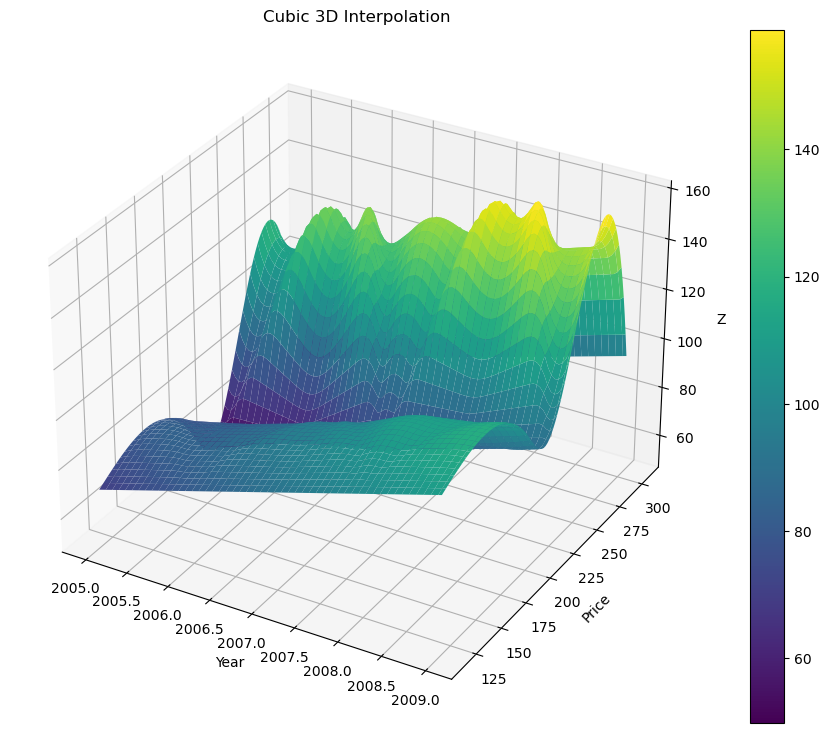

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Create a 3D dataset (example data)
x = year[:5]
y = price[:5]
z = np.array([[50, 60, 70, 80, 90],
              [55, 65, 75, 85, 95],
              [60, 70, 80, 90, 100],
              [65, 75, 85, 95, 105],
              [70, 80, 90, 100, 110]])

# Define a structured grid for visualization
x_new, y_new = np.meshgrid(x, y)

# Define a finer grid for interpolation
x_interp, y_interp = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

# Perform cubic 3D interpolation
z_new = griddata((x_new.ravel(), y_new.ravel()), z.ravel(), (x_interp, y_interp), method='cubic')

# Create a 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Cubic 3D Interpolation')

# Plot the interpolated surface
surf = ax.plot_surface(x_interp, y_interp, z_new, cmap='viridis')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_zlabel('Z')
fig.colorbar(surf)
plt.savefig("cubic_3d_interpolaion")
plt.show()


In [167]:
z.shape

(5, 5)

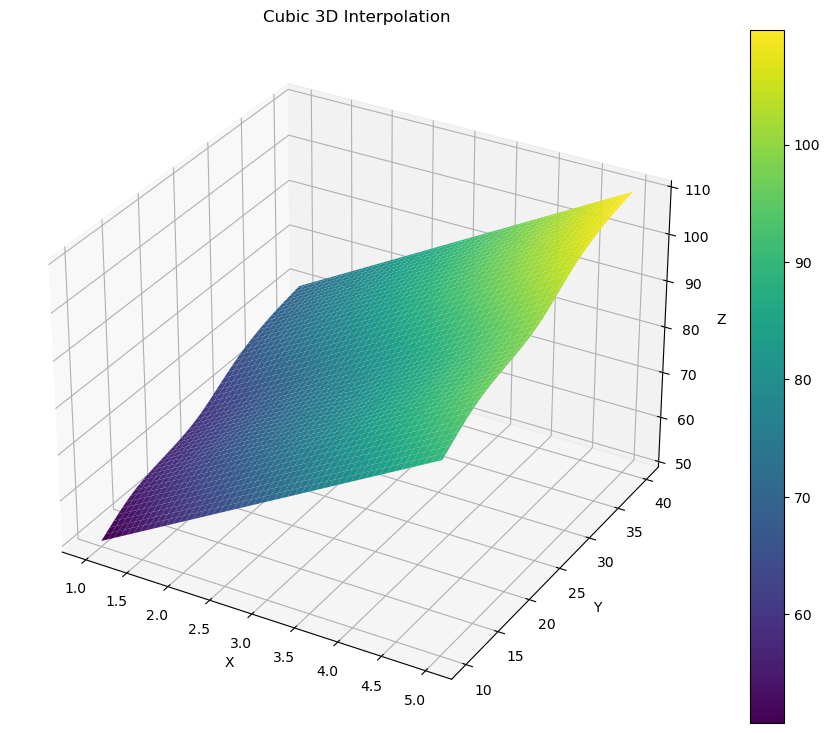

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Create 1D arrays for x and y
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 15, 25, 30, 40])

# Create a 1D array for z
z = np.array([  # Replace this with your own z values
    50, 60, 70, 80, 90,
    55, 65, 75, 85, 95,
    60, 70, 80, 90, 100,
    65, 75, 85, 95, 105,
    70, 80, 90, 100, 110,
])

# Define a structured grid for visualization
x_new, y_new = np.meshgrid(x, y)

# Define a finer grid for interpolation
x_interp, y_interp = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

# Perform cubic 3D interpolation
z_new = griddata((x_new.ravel(), y_new.ravel()), z, (x_interp, y_interp), method='cubic')

# Create a 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Cubic 3D Interpolation')

# Plot the interpolated surface
surf = ax.plot_surface(x_interp, y_interp, z_new, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf)

plt.show()


In [109]:
year3 = np.linspace(2005,2022,200)
[year for year3 if year>=2020]
f2 = interp1d(np.append(year, [2021,2022]), np.append(price, [150,5]), kind='cubic')

SyntaxError: invalid syntax (755628595.py, line 2)

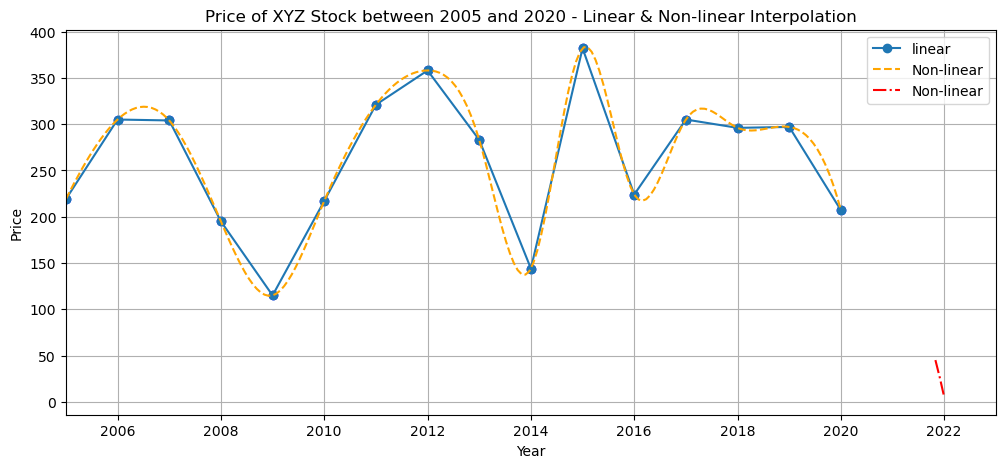

In [106]:
plt.figure(figsize=(12,5))
plt.plot(df['Year'], df["Price"], marker="o", label="linear")
plt.plot(year2, f1(year2), color="orange", ls="--", label="Non-linear")
plt.plot(year3[-3:],f2(year3)[-3:], color="red", ls="-.", label="Non-linear")

plt.scatter(year, price, color = "blue", marker="o")
#plt.scatter(, price, color = "red", marker="o")

plt.title("Price of XYZ Stock between 2005 and 2020 - Linear & Non-linear Interpolation")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xlim(2005,2023)
plt.grid()
plt.legend()
plt.show()

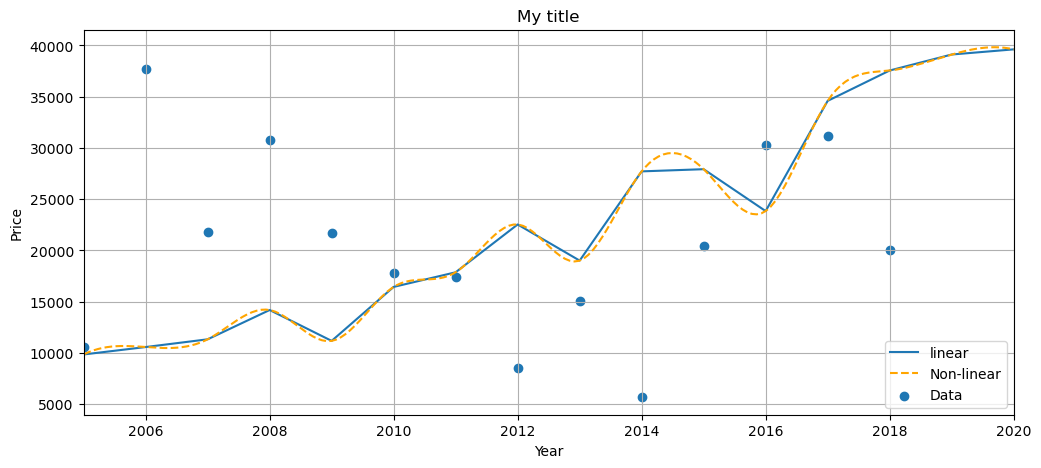

In [84]:
x = [1,2,3]

In [86]:
x+[4]

[1, 2, 3, 4]

In [14]:
yr = np.log(year)
pr = np.log(price)
poly = lagrange(yr,pr)
print(poly)

           15             14             13             12
6.686e+40 x  - 7.629e+42 x  + 4.062e+44 x  - 1.339e+46 x 
              11             10             9             8
 + 3.056e+47 x  - 5.115e+48 x  + 6.485e+49 x - 6.342e+50 x
              7             6             5             4             3
 + 4.825e+51 x - 2.855e+52 x + 1.303e+53 x - 4.505e+53 x + 1.142e+54 x
              2
 - 2.006e+54 x + 2.179e+54 x - 1.105e+54


In [15]:
Polynomial(poly.coef[-3:-1])(2010)

4.37871787345948e+57

In [16]:
x = [1,2,3]
x[::-1]

[3, 2, 1]

In [17]:
Polynomial(poly.coef[::-1])(2015.7)

2.3275671594208365e+90

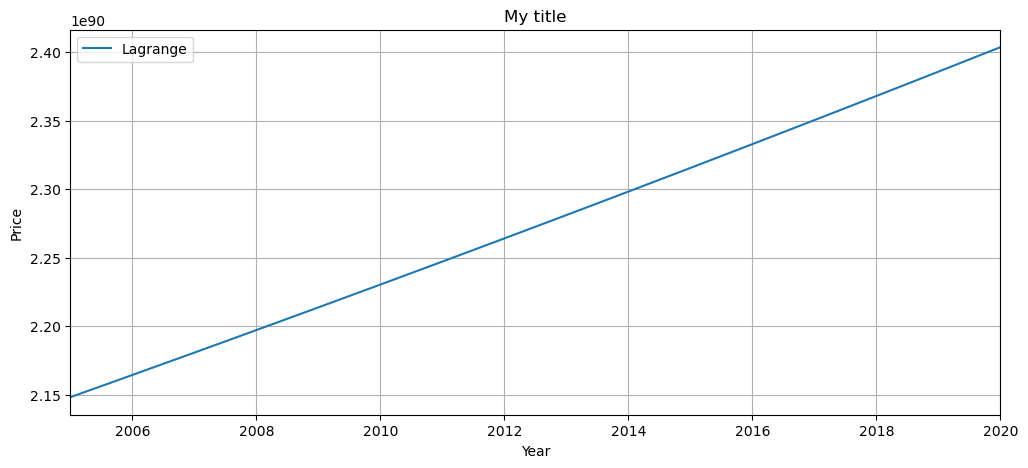

In [18]:
plt.figure(figsize=(12,5))
#plt.plot(df['Year'].sort_values(), df["Price"], marker="o", label="linear")
plt.plot(year, Polynomial(poly.coef[::-1])(year), label='Lagrange')
#plt.plot(year2, f1(year2), color="orange", ls="--", label="Non-linear")
#plt.scatter(year, price, marker="o", label="Data")
plt.title("My title")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xlim(2005,2020)
plt.grid()
plt.legend()

In [19]:
price.sort()
price

array([ 9847, 10571, 11172, 11325, 14183, 16438, 17866, 19006, 22531,
       23837, 27712, 27925, 34590, 37554, 39115, 39617])

In [20]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

X = year
Y = price

n = len(X)
poly = Polynomial(np.zeros(n))

for j in range(n):
    k = [k for k in range(n) if k != j]
    roots = -1 * X[k]

    sub_poly = Polynomial.fromroots(X[k])
    scale = Y[j] / np.prod(X[j] - X[k])
    sub_poly.coef *= scale

    poly.coef += sub_poly.coef

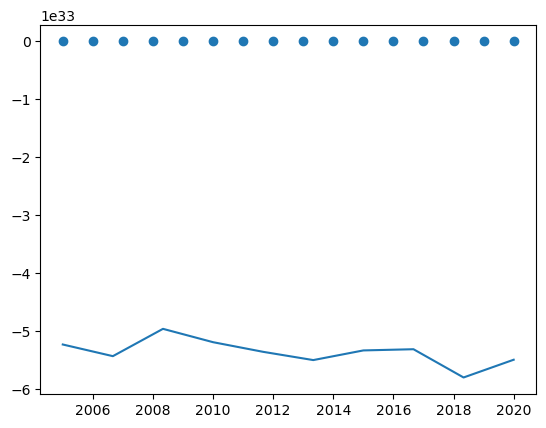

In [21]:
plt.scatter(X, Y)
Xinterp = np.linspace(min(X), max(X), 10)
plt.plot(Xinterp, poly(Xinterp))
plt.show()

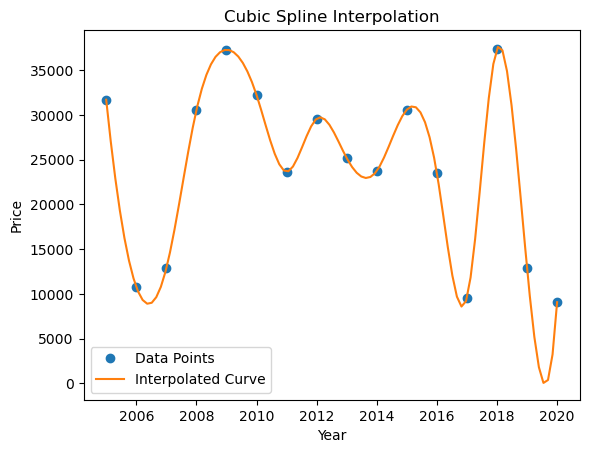

In [22]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

# Your data
year = np.linspace(2005, 2020, 16).astype(int)
price = np.random.randint(5000, 40000, 16)

# Create a cubic spline interpolation
interpolator = interp.CubicSpline(year, price)

# Generate new points for the interpolation curve
new_years = np.linspace(2005, 2020, 100)
interpolated_prices = interpolator(new_years)

# Plot the original data and the interpolated curve
plt.plot(year, price, 'o', label='Data Points')
plt.plot(new_years, interpolated_prices, label='Interpolated Curve')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Cubic Spline Interpolation')
plt.show()

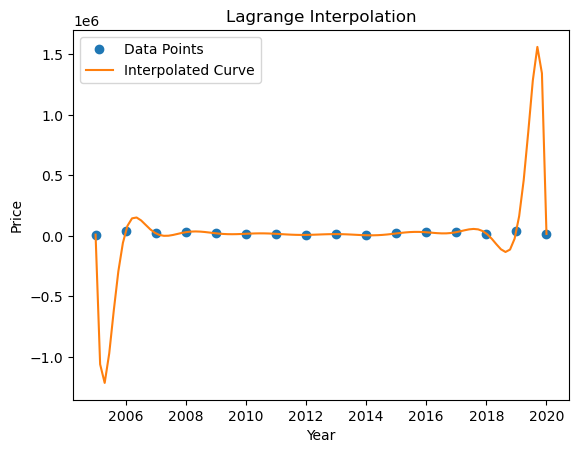

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
year = np.linspace(2005, 2020, 16).astype(int)
price = np.random.randint(5000, 40000, 16)
# Lagrange interpolation function
def lagrange_interpolation(x, x_data, y_data):
    n = len(x_data)
    result = 0

    for i in range(n):
        term = y_data[i]
        for j in range(n):
            if i != j:
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
        result += term

    return result

# Generate points for the interpolation curve
new_years = np.linspace(2005, 2020, 100)
interpolated_prices = [lagrange_interpolation(x, year, price) for x in new_years]

# Plot the original data and the interpolated curve
plt.plot(year, price, 'o', label='Data Points')
plt.plot(new_years, interpolated_prices, label='Interpolated Curve')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lagrange Interpolation')
plt.show()